In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
dt = pd.read_excel('CBR64-3Prv_Practice.xlsx')
dt = pd.DataFrame(dt)
print(dt)

    1.2 ความเกี่ยวข้องของโครงการ 1.3 คำนำหน้า  1.4 เพศ  1.5  อายุ  \
0               1) กลุ่มเป้าหมาย    2) นางสาว  2) หญิง       56.0   
1               1) กลุ่มเป้าหมาย    2) นางสาว  2) หญิง       66.0   
2               1) กลุ่มเป้าหมาย    2) นางสาว  2) หญิง       59.0   
3               1) กลุ่มเป้าหมาย    2) นางสาว  2) หญิง       35.0   
4               1) กลุ่มเป้าหมาย       3) นาง  2) หญิง       36.0   
..                           ...          ...      ...        ...   
198                  2) คู่เทียบ       1) นาย   1) ชาย       45.0   
199                  2) คู่เทียบ    2) นางสาว  2) หญิง       31.0   
200                  2) คู่เทียบ       1) นาย   1) ชาย       40.0   
201                  2) คู่เทียบ    2) นางสาว  2) หญิง       30.0   
202                  2) คู่เทียบ       1) นาย   1) ชาย       58.0   

    วันเดือนปีเกิด  1.6 สถานภาพ   จังหวัด      1.8 ระดับการศึกษาสูงสุด  \
0         26042508      2) สมรส  นราธิวาส                1) ประถมศึกษา   
1          1012498     

In [7]:
dt.columns = [    "stt", "tit", "sex", "age", "brtdte", "mar", "prv", "edu", "occ", 
    "sal", "q53", "q54", "q57", "q58", "q61", "q62", "q63", "q64", 
    "q65", "q66", "q67", "q68"]

print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stt     203 non-null    object 
 1   tit     203 non-null    object 
 2   sex     203 non-null    object 
 3   age     201 non-null    float64
 4   brtdte  201 non-null    object 
 5   mar     203 non-null    object 
 6   prv     203 non-null    object 
 7   edu     203 non-null    object 
 8   occ     197 non-null    object 
 9   sal     171 non-null    float64
 10  q53     70 non-null     float64
 11  q54     38 non-null     float64
 12  q57     29 non-null     float64
 13  q58     28 non-null     float64
 14  q61     202 non-null    float64
 15  q62     203 non-null    int64  
 16  q63     203 non-null    int64  
 17  q64     203 non-null    int64  
 18  q65     203 non-null    int64  
 19  q66     203 non-null    int64  
 20  q67     203 non-null    int64  
 21  q68     201 non-null    float64
dtypes:

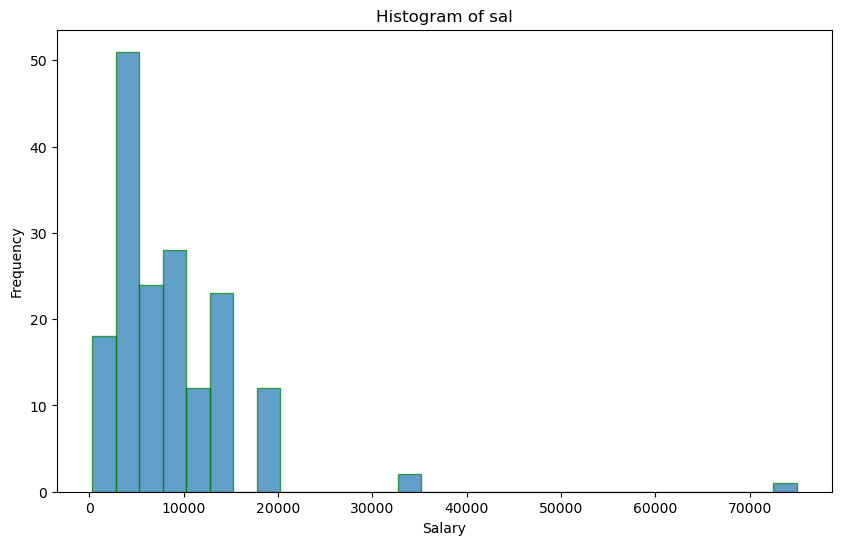

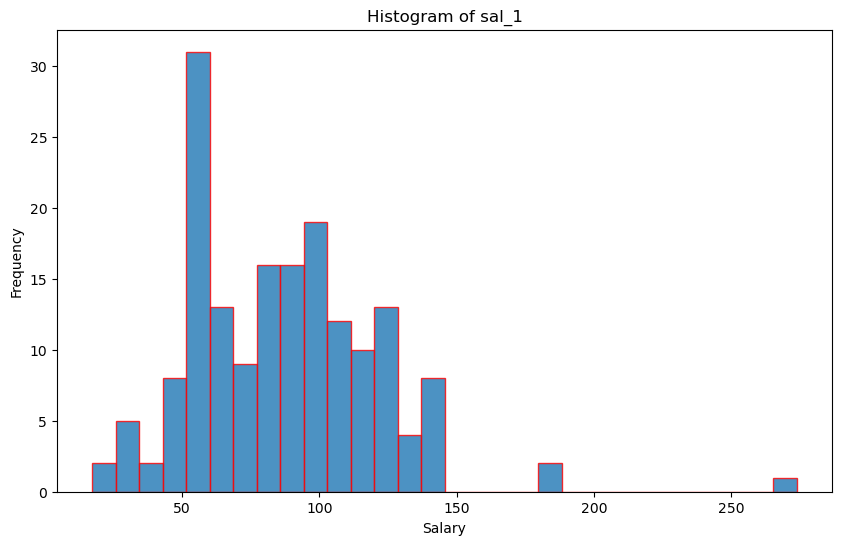

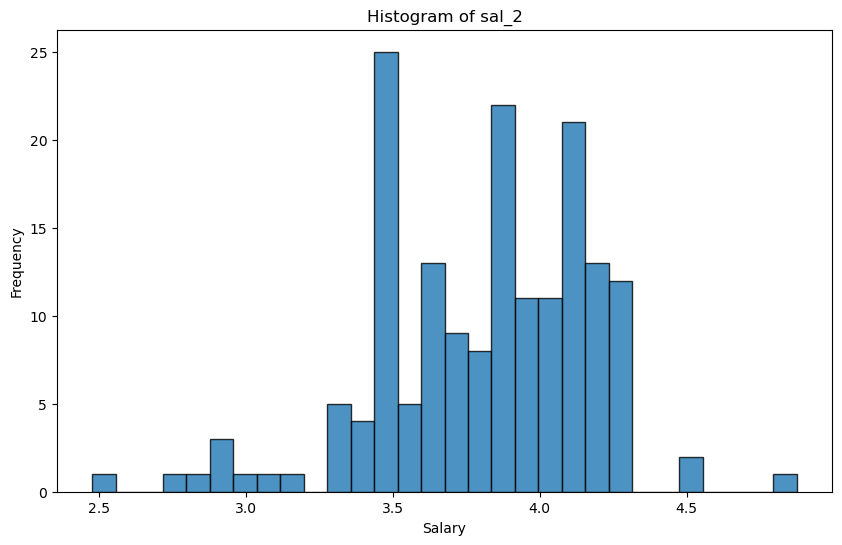

In [8]:
import scipy.stats as stats
plt.figure(figsize=(10,6)) #The figsize parameter sets the size of the figure in inches. It takes a tuple of two values: 10 is width and 6 is height
plt.hist(dt['sal'].dropna(),bins=30,edgecolor='g',alpha = 0.7)
plt.title("Histogram of sal")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

#apply square root
dt['sal_1'] = np.sqrt(dt['sal'])
plt.figure(figsize=(10,6))
plt.hist(dt['sal_1'], bins=30, edgecolor='red',alpha=0.8)
plt.title("Histogram of sal_1")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

#apply log transformation
dt['sal_2'] = np.log10(dt['sal']+0.001)
plt.figure(figsize=(10,6))
plt.hist(dt['sal_2'], bins=30, edgecolor='black', alpha=0.8)
plt.title("Histogram of sal_2")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()


In [9]:
dt['q5ro_total'] = dt['q57']*dt['q58']
print(dt['q5ro_total'])

0         NaN
1         NaN
2      7200.0
3         NaN
4         NaN
        ...  
198       NaN
199       NaN
200       NaN
201       NaN
202       NaN
Name: q5ro_total, Length: 203, dtype: float64


In [10]:
columns_sum = ["sal", "q53", "q61", "q62", "q63", "q64", "q65", "q66", "q68"]
dt['qinc_mtotal'] = dt[columns_sum].sum(axis=1, skipna=True)
print(dt['qinc_mtotal'])

0       7100.0
1       4900.0
2        600.0
3       4400.0
4       5700.0
        ...   
198     4600.0
199    34200.0
200    26900.0
201        0.0
202     7600.0
Name: qinc_mtotal, Length: 203, dtype: float64


In [11]:
dt['qinc_ytotal']= dt['qinc_mtotal']*12
print(dt['qinc_ytotal'])

0       85200.0
1       58800.0
2        7200.0
3       52800.0
4       68400.0
         ...   
198     55200.0
199    410400.0
200    322800.0
201         0.0
202     91200.0
Name: qinc_ytotal, Length: 203, dtype: float64


In [12]:
sum_inctotal = ["q5ro_total", "qinc_ytotal", "q54", "q67"]
dt['inctotal'] = dt[sum_inctotal].sum(axis=1, skipna=True)
print(dt['inctotal'])


0      115200.0
1       83800.0
2       34400.0
3       62800.0
4       98400.0
         ...   
198     80200.0
199    479400.0
200    342800.0
201     45000.0
202    121200.0
Name: inctotal, Length: 203, dtype: float64


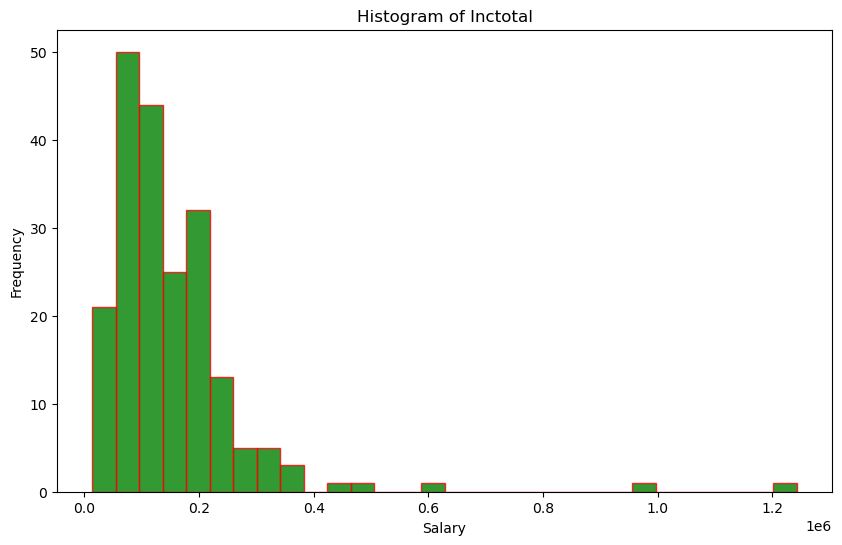

In [13]:
#Use square root to calculate
dt['inctotal_1'] = np.sqrt(dt['inctotal'])
plt.figure(figsize=(10,6))
plt.hist(dt['inctotal'], bins=30,edgecolor='red',alpha=0.8,color='g')
plt.title("Histogram of Inctotal")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

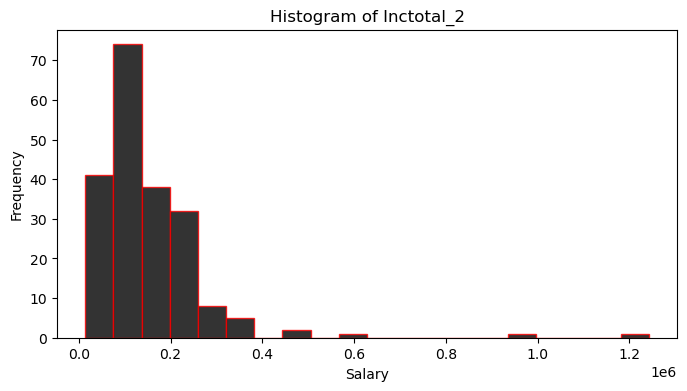

In [14]:
#use logarithm to calculate
dt['inctotal_2'] = np.log10(dt['inctotal']+0.001)
plt.figure(figsize=(8,4))
plt.hist(dt['inctotal'], bins=20, color="black", edgecolor="red", alpha=0.8)
plt.title("Histogram of Inctotal_2")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

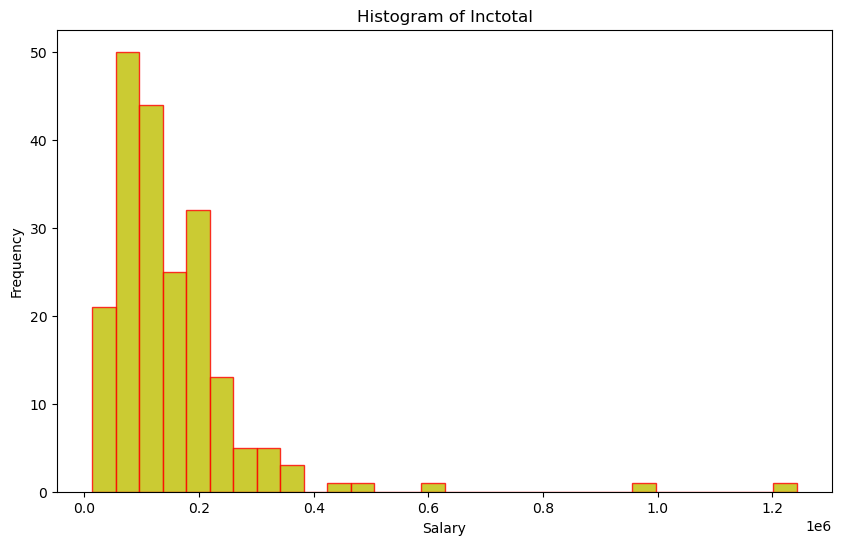

In [15]:
#use 1/ 
dt['inctotal_3'] = 1/(dt['inctotal'])
plt.figure(figsize=(10,6))
plt.hist(dt['inctotal'], bins=30,edgecolor='red',alpha=0.8,color='y')
plt.title("Histogram of Inctotal")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

In [16]:
dt['incmon'] = dt['inctotal']/12
print(dt['incmon'])

0       9600.000000
1       6983.333333
2       2866.666667
3       5233.333333
4       8200.000000
           ...     
198     6683.333333
199    39950.000000
200    28566.666667
201     3750.000000
202    10100.000000
Name: incmon, Length: 203, dtype: float64


In [24]:
# dt['incmon_grp'] = dt['incmon'] #make a new variable with a name is incmon_grp

dt['incmon_grp'] = np.where(dt['incmon'] < 2686,1
                    , np.where(dt['incmon'] <3173,2,
                    np.where(dt['incmon']<5346,3,4)))
print(dt['incmon_grp'])

# count how many number of 1 2 3 4 values
frequency_table = dt['incmon_grp'].value_counts().sort_index()
print(frequency_table)

# give a percentage to the table
percent_table = dt['incmon_grp'].value_counts(normalize=True).sort_index()*100
frequency_and_percent = pd.DataFrame({"Count": frequency_table, "Percentage": percent_table})
print(frequency_and_percent) 



0      4
1      4
2      2
3      3
4      4
      ..
198    4
199    4
200    4
201    3
202    4
Name: incmon_grp, Length: 203, dtype: int32
1      6
2      3
3     19
4    175
Name: incmon_grp, dtype: int64
   Count  Percentage
1      6    2.955665
2      3    1.477833
3     19    9.359606
4    175   86.206897


In [30]:

frequency_table = pd.crosstab(dt['prv'], dt['incmon_grp'], margins=False)
percentage_table = pd.crosstab(dt['prv'], dt['incmon_grp'], normalize='index') * 100
print("Frequency Table:")
print(frequency_table)
print("\nPercentage Table:")
print(percentage_table)

#show a table of prv and incmon_grp
pd.crosstab(dt['prv'],dt['incmon_grp'])


Frequency Table:
incmon_grp  1  2   3    4
prv                      
ตากใบ       0  0   0    4
นราธิวาส    2  2  10  104
นานาค       0  0   0    1
ปัตตานี     1  1   5   33
ยะลา        3  0   4   33

Percentage Table:
incmon_grp         1         2          3           4
prv                                                  
ตากใบ       0.000000  0.000000   0.000000  100.000000
นราธิวาส    1.694915  1.694915   8.474576   88.135593
นานาค       0.000000  0.000000   0.000000  100.000000
ปัตตานี     2.500000  2.500000  12.500000   82.500000
ยะลา        7.500000  0.000000  10.000000   82.500000


incmon_grp,1,2,3,4
prv,,,,
ตากใบ,0,0,0,4
นราธิวาส,2,2,10,104
นานาค,0,0,0,1
ปัตตานี,1,1,5,33
ยะลา,3,0,4,33


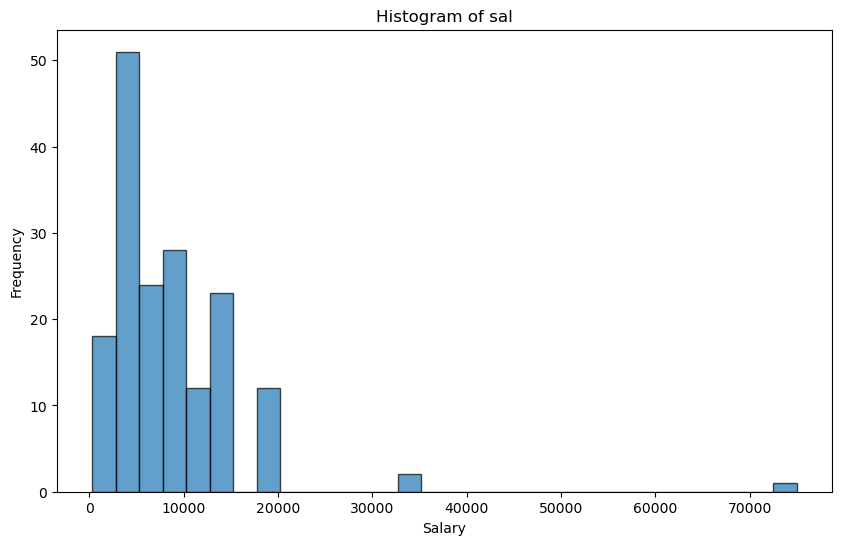

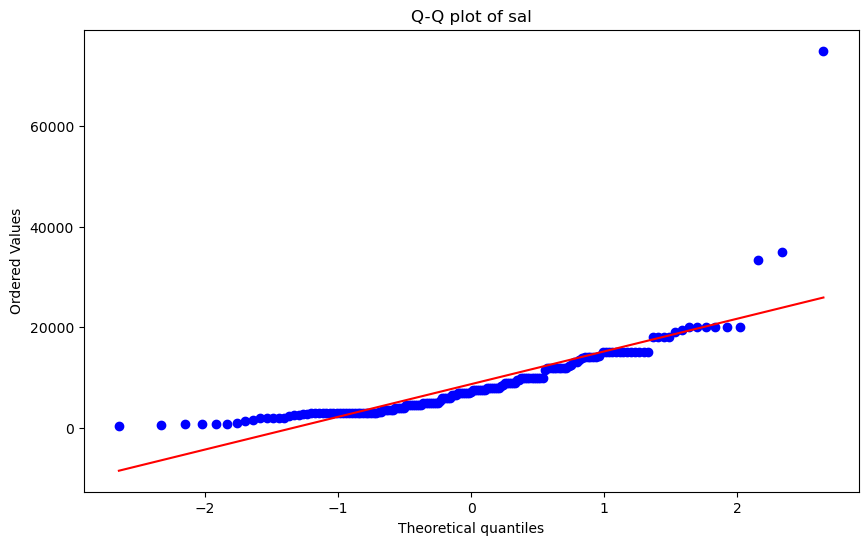

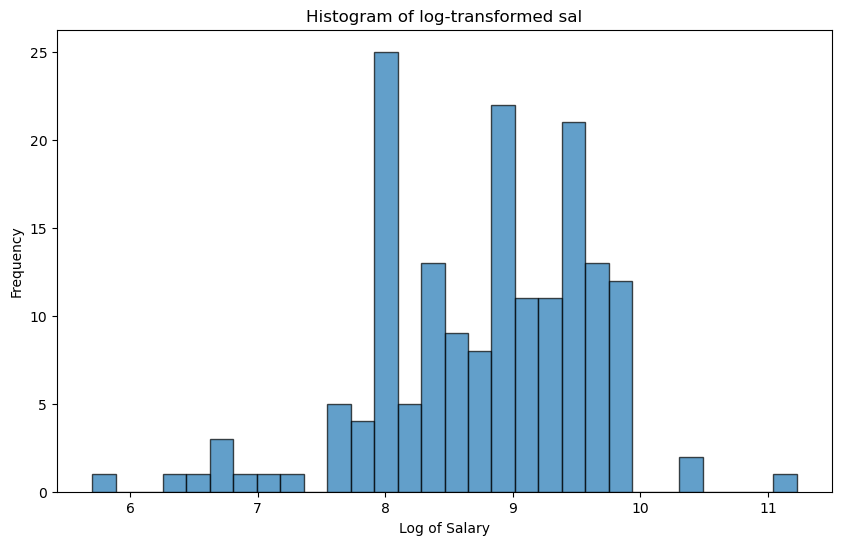

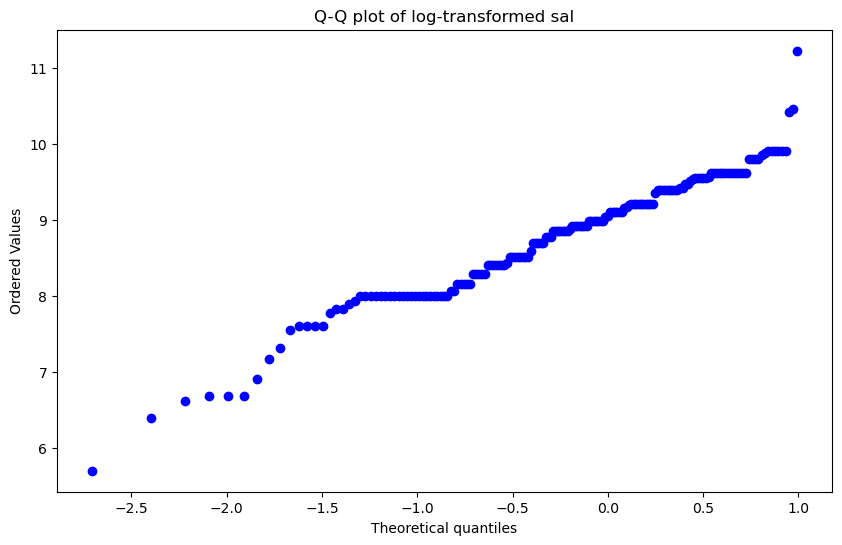

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# Plot histogram of 'sal'
plt.figure(figsize=(10, 6))
plt.hist(dt['sal'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of sal')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Check for normality using Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(dt['sal'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q plot of sal')
plt.show()

# If data is not normally distributed, apply log transformation
# Note: log transformation only applies to positive values
dt['sal_log'] = np.log(dt['sal'].replace(0, np.nan).dropna())

# Plot histogram of transformed 'sal_log'
plt.figure(figsize=(10, 6))
plt.hist(dt['sal_log'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of log-transformed sal')
plt.xlabel('Log of Salary')
plt.ylabel('Frequency')
plt.show()

# Check for normality of transformed data using Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(dt['sal_log'], dist="norm", plot=plt)
plt.title('Q-Q plot of log-transformed sal')
plt.show()
